# Attention !!!
- Please write or take a screenshot of all answers in the pdf file. You won't be graded if there is no pdf file in the submission.
- Only TODO 1, 2, 3, 4, 5, 6, 10, 11 will be graded.
- **Extra credit:** 1% of total grade for Com Eng Math 2 for TODO 7, 8, 9 (1/3 each.)

# Sampling

Sampling is a process that is very important for writing simulations. In this section, you will try to sample from some common distributions.

TODO#1: Write functions that samples from the following distribution
1. $\mathcal{N}(0,1)$
2. $Bernoulli(0.3)$
3. $B(10, 0.3)$
4. $Multinomial(n=10, p=[0.3,0.2,0.5])$
5. $U(0,1)$
<!-- 6. $T(0,1)$; $T(a,b)$ is defined as a function with a shape of a triangle that pass through point $(a,0)$, $(b,0)$, and $(b, K):\frac{(b-a)K}{2}=1$. -->
6. $T(0,1)$; $T(a,b)$ is defined as a function with a shape of a triangle that pass through point $(a,0)$, $(b,0)$, and $(\frac{a+b}{2}, K):\frac{(b-a)K}{2}=1$.

Capture screenshot of the histogram for each of the distribution and paste them on the pdf file. The example is shown below.

Hint: see scipy.stats for common distributions.
[plt.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) should be helpful for plotting histograms

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, bernoulli, binom, multinomial, uniform, expon
from scipy.integrate import quad

def sample_normal(sample_size=10, mu=0, std=1):
  # TODO#1.1: #
  return np.random.normal(loc=mu, scale=std, size=sample_size)


def sample_bernoulli(sample_size=10, p=0.5):
  # TODO#1.2:
  return bernoulli.rvs(p, size=sample_size)


def sample_binomial(sample_size=10, n=10, p=0.5):
  # TODO#1.3:
  return binom.rvs(n=n, p=p, size=sample_size)


def sample_multinomial(sample_size=10, n=100, p=[0.3, 0.2, 0.5]):
  # TODO#1.4:
  return multinomial.rvs(n=n, p=p, size=sample_size)


def sample_uniform(sample_size=10, from_x=0, to_x=1):
  # TODO#1.5:
  return uniform.rvs(loc=from_x, scale=to_x - from_x, size=sample_size)


def sample_triangle(sample_size=10, a=0, b=1):
  # TODO#1.6:
  peak = (a + b) / 2
  return np.random.triangular(left=a, mode=peak, right=b, size=sample_size)

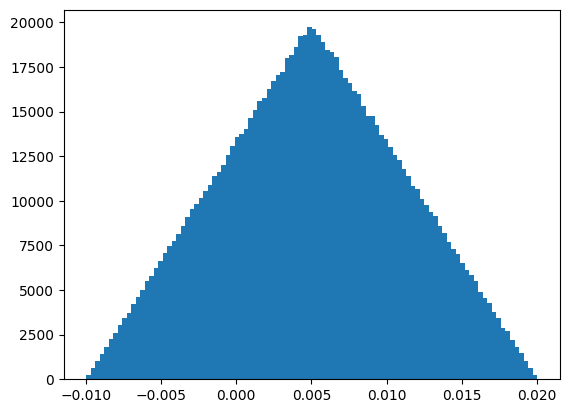

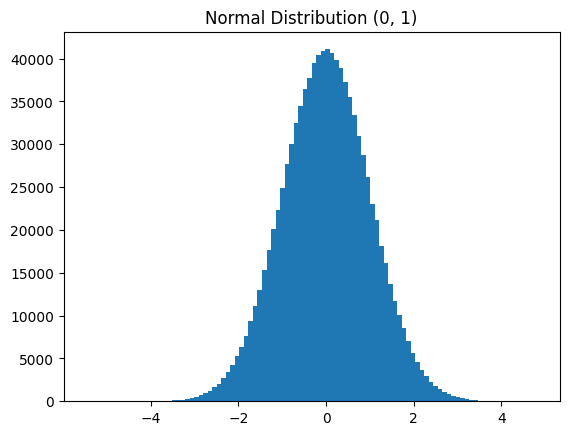

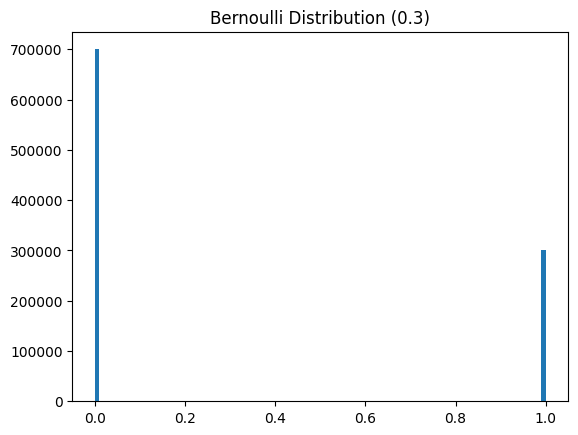

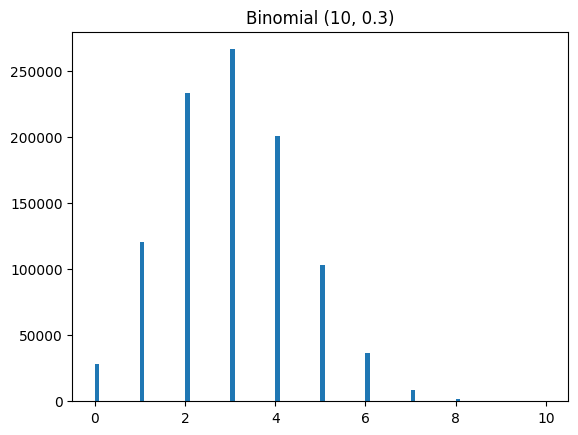

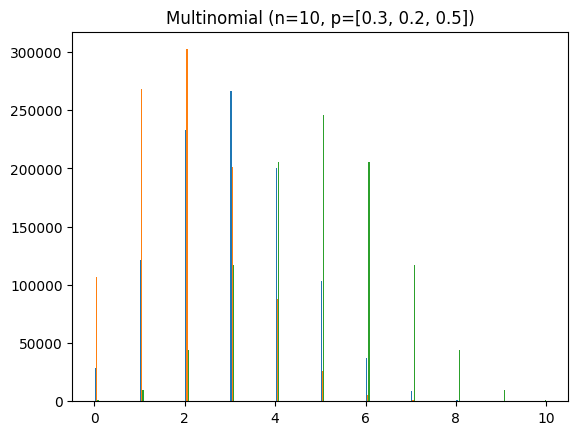

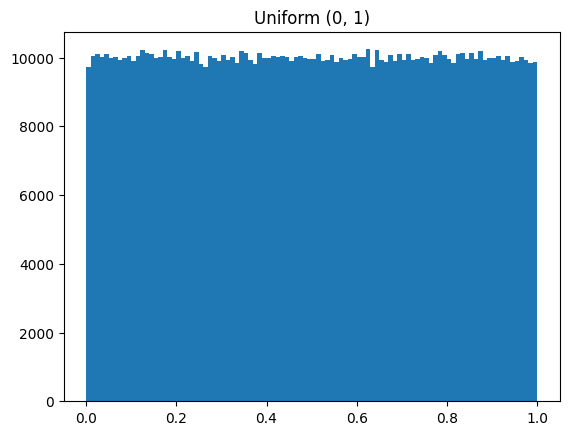

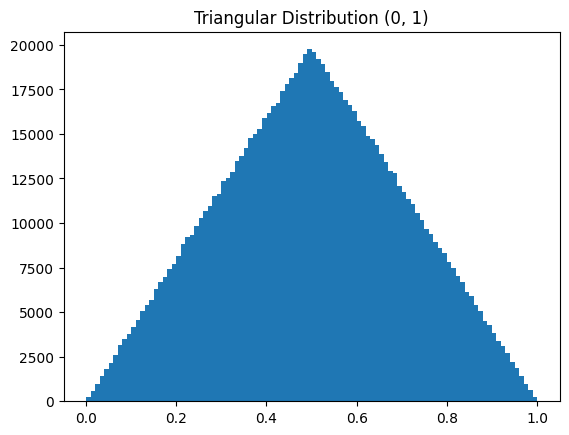

In [2]:
# Use this code block to show your sampling result.
sample_size = 1000000
s = sample_triangle(sample_size, -0.01, 0.02)
count, bins, ignored = plt.hist(s, 100, density=False)
plt.show()

# 1. Normal Distribution N(0,1)
s = sample_normal(sample_size, mu=0, std=1)
plt.hist(s, bins=100, density=False)
plt.title("Normal Distribution (0, 1)")
plt.show()

#2. Bernoulli Distribution Bernoulli(0.3)
s = sample_bernoulli(sample_size, p=0.3)
plt.hist(s, bins=100, density=False)
plt.title("Bernoulli Distribution (0.3)")
plt.show()

#3. Binomial distribution
s = sample_binomial(sample_size, n=10, p=0.3)
plt.hist(s, bins=100, density=False)
plt.title("Binomial (10, 0.3)")
plt.show()

#4. Multinomial distribution
s = sample_multinomial(sample_size, n=10, p=[0.3, 0.2, 0.5])
plt.hist(s, bins=100, density=False)
plt.title("Multinomial (n=10, p=[0.3, 0.2, 0.5])")
plt.show()

#5. Uniform distribution
s = sample_uniform(sample_size, from_x=0, to_x=1)
plt.hist(s, bins=100, density=False)
plt.title("Uniform (0, 1)")
plt.show()

# 6. Triangular Distribution T(-0.01, 0.02)
s = sample_triangle(sample_size, a=0, b=1)
plt.hist(s, bins=100, density=False)
plt.title("Triangular Distribution (0, 1)")
plt.show()

# Law of large number

### Law of large number

**TODO#2:** Using a sampling function from TODO#1.1, Plot the graph that shows the relation between an empirical mean and sampling size from 1 up to 10000.
What does the graph imply about the difference between the empirical mean and the theoritical mean?

เมื่อเพิ่มขนาดของตัวอย่าง ค่า empirical mwan จะเข้าใกล้ theoretical mean มากขึ้น

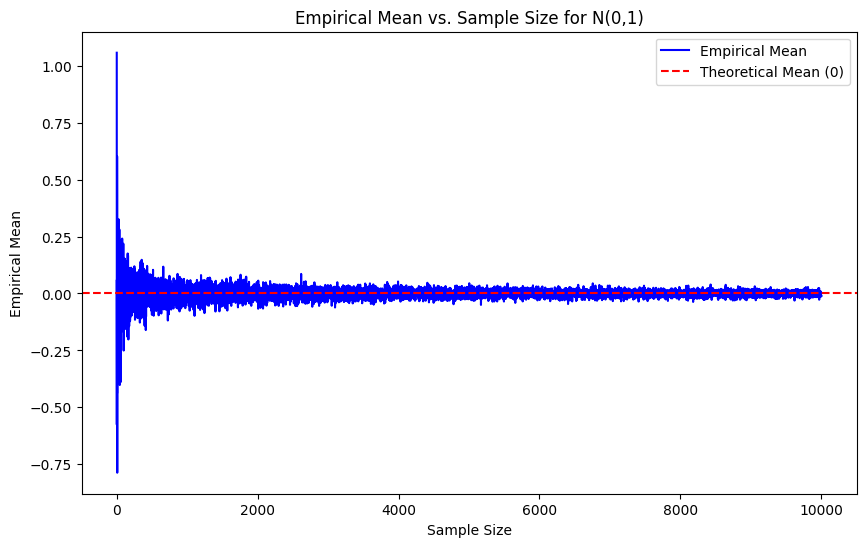

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to calculate empirical means for increasing sample sizes
def empirical_mean_vs_sample_size(max_sample_size=10000, mu=0, std=1):
    sample_sizes = range(1, max_sample_size + 1)
    empirical_means = []

    # Generate samples for each sample size and calculate the empirical mean
    for n in sample_sizes:
        samples = np.random.normal(loc=mu, scale=std, size=n)
        empirical_means.append(np.mean(samples))

    # Plot the empirical mean as a function of sample size
    plt.figure(figsize=(10, 6))
    plt.plot(sample_sizes, empirical_means, label="Empirical Mean", color="blue")
    plt.axhline(y=mu, color="red", linestyle="--", label="Theoretical Mean (0)")
    plt.xlabel("Sample Size")
    plt.ylabel("Empirical Mean")
    plt.title("Empirical Mean vs. Sample Size for N(0,1)")
    plt.legend()
    plt.show()

# Run the function to generate the plot
empirical_mean_vs_sample_size(max_sample_size=10000, mu=0, std=1)

### Law of large number for histogram

The histogram is used to approximate the PDF of an unknown distribution.
The bin in the histogram represents the frequency of the event happening inside the bin range.

**TODO#3:** Given a fix bin number of 40. Plot the histogram of the data sampling from the function, `sample_normal(n, 0, 1)`, for different sizes of sample: 500, 1k, 5k and 10k.
Compare and explain the relation between the approximation given by the histogram and the true PDF for each of the sample size.

เมื่อเพิ่ม sample size แล้ว histogram จะยิ่งใกล้เคียงกับ PDF มากขึ้น

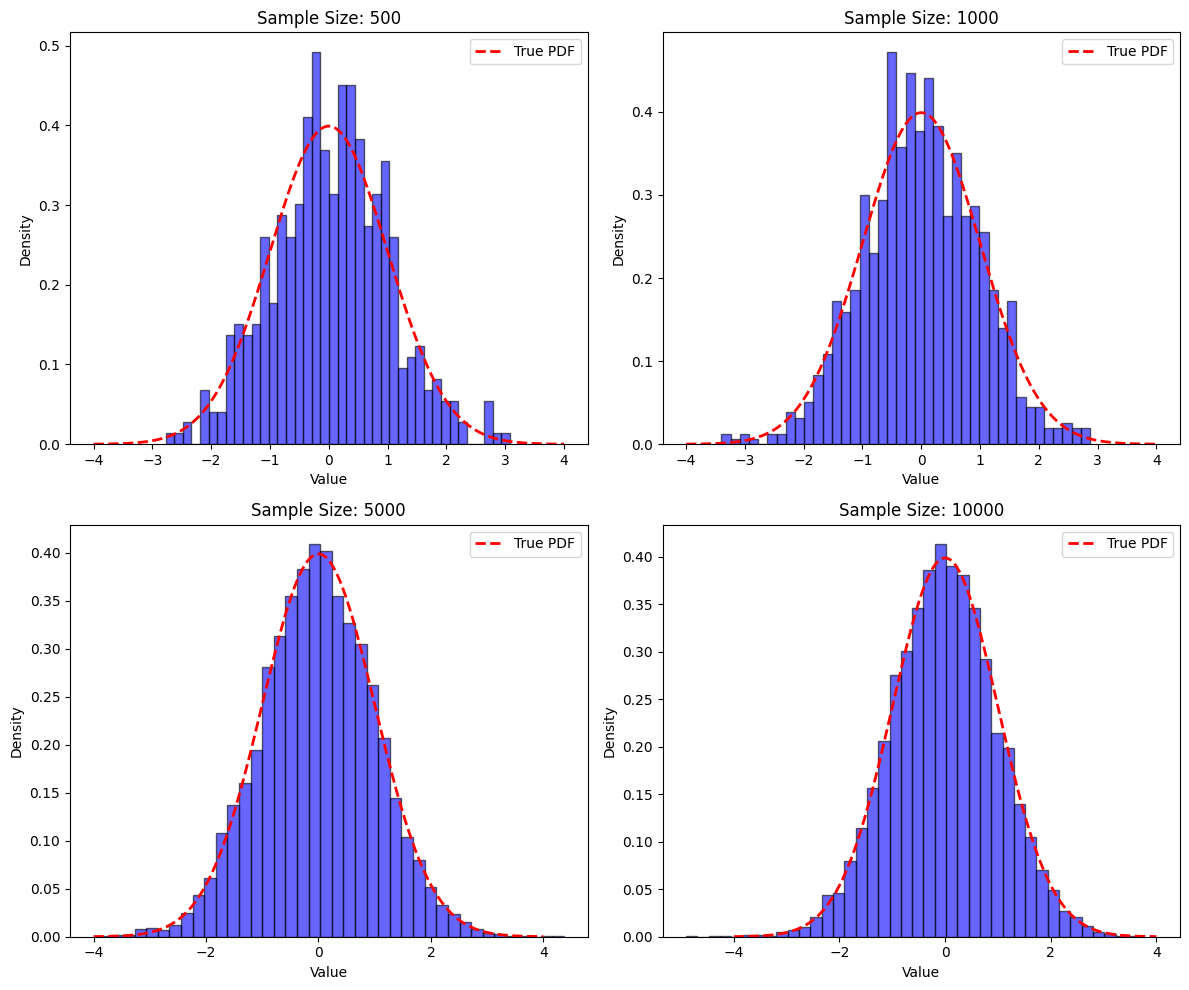

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Function to generate samples from N(0,1)
def sample_normal(sample_size, mu=0, std=1):
    return np.random.normal(loc=mu, scale=std, size=sample_size)

# Define sample sizes
sample_sizes = [500, 1000, 5000, 10000]
bins = 40

# Set up the figure
plt.figure(figsize=(12, 10))

# Plot histograms for each sample size
for i, size in enumerate(sample_sizes, 1):
    plt.subplot(2, 2, i)

    # Generate samples
    samples = sample_normal(size, 0, 1)

    # Plot histogram (normalized to form a PDF approximation)
    plt.hist(samples, bins=bins, density=True, alpha=0.6, color='blue', edgecolor='black')

    # Overlay the true PDF of N(0,1)
    x = np.linspace(-4, 4, 1000)
    plt.plot(x, norm.pdf(x, 0, 1), color='red', linestyle='--', linewidth=2, label="True PDF")

    # Set titles and labels
    plt.title(f'Sample Size: {size}')
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Central limit theorem

In this part we will use the Central Limit Theorem to approximate the true probabity of getting more than 40 heads when an unfair coin, with the probability 0.3 of being head, is tossed 100 times.


**TODO#4:** Simulate multiple coin tosses to construct a histrogram from the outcomes. Plot the histogram. Hint: x-axis should represents the number of heads when the coin is tossed 100 times. Does this histogram looks like a normal distribution?

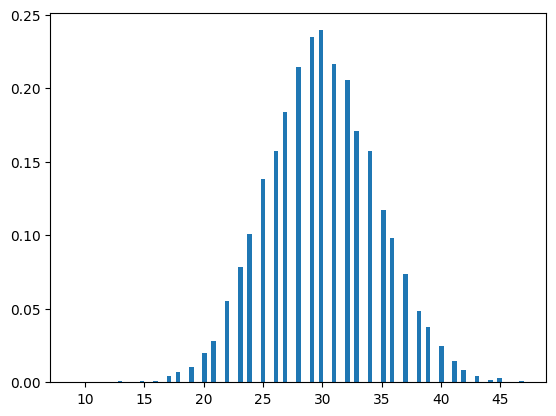

In [5]:
# Code here
sample_size = 10000
s = sample_binomial(sample_size=sample_size, n=100, p=0.3)
plt.hist(s, 101, density=True)
plt.show()

**TODO#5:** Use CLT to find the probability of getting more than 40 heads.

In [6]:
# Parameters
n = 100         # Number of tosses
p = 0.3         # Probability of heads
X = 40          # We want P(X > 40)

# Mean and standard deviation for the normal approximation
mu = n * p
sigma = (n * p * (1 - p)) ** 0.5

# Z-score for X = 40
z = (X - mu) / sigma

# Probability P(X > 40) using the normal approximation
prob_more_than_40_heads = 1 - norm.cdf(z)
print(f"Probability of getting more than 40 heads: {prob_more_than_40_heads:.4f}")

Probability of getting more than 40 heads: 0.0145


**TODO#6:** Compare and find the difference between CLT's approximation and the actual probability using the binomial distribution.

In [7]:
# Parameters
n = 100         # Number of tosses
p = 0.3         # Probability of heads
X = 40          # We want P(X > 40)

# Using CLT (normal approximation)
mu = n * p
sigma = (n * p * (1 - p)) ** 0.5
z = (X - mu) / sigma
clt_probability = 1 - norm.cdf(z)

# Using the actual binomial distribution
binomial_probability = 1 - binom.cdf(X, n, p)

# Output the results
print(f"Probability using CLT approximation: {clt_probability:.4f}")
print(f"Actual probability using binomial distribution: {binomial_probability:.4f}")
print(f"Difference: {abs(clt_probability - binomial_probability):.4f}")

Probability using CLT approximation: 0.0145
Actual probability using binomial distribution: 0.0125
Difference: 0.0020


# Algebra of Random Variables

Given an independent random variable $X$ and $Y$, such that $X \sim F$ and $Y \sim U(3,5)$. The summation of those two is written as $Z = X + Y$ and the PDF of $F$ is defined below.
$$
F(X) =
\begin{cases}
0.1, & -2<=X<=0\\
0.4, & 0<X<=2 \\
\end{cases}
$$
**TODO#7:** Find $P( 3 < Z < 5 )$.

In [8]:
# Define the PDF of X
def f_X(x):
    if -2 <= x <= 0:
        return 0.1
    elif 0 < x <= 2:
        return 0.4
    else:
        return 0

# Define the PDF of Y (uniform distribution between 3 and 5)
def f_Y(y):
    if 3 <= y <= 5:
        return 0.5
    else:
        return 0

# Define the PDF of Z = X + Y by convolution, splitting the integral
def f_Z(z):
    # Integrate separately over [-2, 0] and [0, 2] to avoid discontinuity
    integrand1 = lambda x: f_X(x) * f_Y(z - x)
    integrand2 = lambda x: f_X(x) * f_Y(z - x)
    result1, _ = quad(integrand1, -2, 0)
    result2, _ = quad(integrand2, 0, 2)
    return result1 + result2

# Calculate P(3 < Z < 5) by integrating f_Z(z) over the interval [3, 5]
probability, _ = quad(f_Z, 3, 5)
print(f"P(3 < Z < 5) = {probability:.4f}")

P(3 < Z < 5) = 0.5000


<ipython-input-8-3759376264bd>:27: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  probability, _ = quad(f_Z, 3, 5)


# Correlation

The correlation captures the linear relationshi between two sets of random variables. The higher magnitude of the correlation indicates a stronger relationship.


**TODO#8:** Find the correlation of $X$ and $Y = X + A$, given that $X \sim U(-1,1)$ and
1. $A = 10$
2. $A \sim U(-1,1)$
3. $A \sim U(-10,10)$
4. $A \sim U(-100,100)$

In [9]:
# Number of samples to approximate correlation
num_samples = 100000

# Generate samples for X ~ U(-1, 1)
X = np.random.uniform(-1, 1, num_samples)

# Function to calculate correlation between X and Y = X + A
def calculate_correlation(A_samples):
    Y = X + A_samples  # Calculate Y = X + A
    # Calculate correlation between X and Y
    correlation = np.corrcoef(X, Y)[0, 1]
    return correlation

# Case 1: A = 10 (constant)
A = np.full(num_samples, 10)  # A is constant with value 10
correlation_case_1 = calculate_correlation(A)
print(f"Case 1 (A = 10): Correlation = {correlation_case_1:.4f}")

# Case 2: A ~ U(-1, 1)
A = np.random.uniform(-1, 1, num_samples)
correlation_case_2 = calculate_correlation(A)
print(f"Case 2 (A ~ U(-1, 1)): Correlation = {correlation_case_2:.4f}")

# Case 3: A ~ U(-10, 10)
A = np.random.uniform(-10, 10, num_samples)
correlation_case_3 = calculate_correlation(A)
print(f"Case 3 (A ~ U(-10, 10)): Correlation = {correlation_case_3:.4f}")

# Case 4: A ~ U(-100, 100)
A = np.random.uniform(-100, 100, num_samples)
correlation_case_4 = calculate_correlation(A)
print(f"Case 4 (A ~ U(-100, 100)): Correlation = {correlation_case_4:.4f}")

Case 1 (A = 10): Correlation = 1.0000
Case 2 (A ~ U(-1, 1)): Correlation = 0.7083
Case 3 (A ~ U(-10, 10)): Correlation = 0.0981
Case 4 (A ~ U(-100, 100)): Correlation = 0.0112


**TODO#9:** From the results in TODO#8, answer following questions
1. Does the correlation decrease as we increase the randomness of A ?
2. Explain the result when we change from $A \sim U(-10,10)$ to $A \sim U(9090,10010)$. Hint: Compare the result with $A$ and $A + 10000: A \sim U(-10,10) $

# Hamtaro and his cloud storage empire.



After the success in the manufacturing business. Hamtaro wants to expand his business into a new sector.
Since cloud computing is currently booming, he decides to enter into the cloud storage business.

The storage disk that Hamtaro uses can operate only in the temperature of $[0,30]$ degree Celcius. The disk has the prabability of a read failure $P(Fail|t) = \frac{0.97}{2250}(t-15)^2+0.001$ where $t$ is the operating temperature.
<!-- Hamtaro's disks has a special architecture that can be  simultaneously read by infinite requests at the same time. However, a failure of one request will cause all of its parallels to fail. -->

Since Hamtoro doesn't want any failures in his service, he decides to buy a super luxury air-conditioning system to control the temperature in his data warehouse. Even if the air conditioner is extremely expensive, the room temperature is still not stable. When Hamtaro tries to set the tempurature to $\mu$, the actual temperature is random and can be modeled by $t\sim U(\mu-1,\mu+1)$.

**TODO#10:** Answer the following questions.
1. What is the temperature that Hamtaro should set the air conditioner to? Justify your answer.
2. What is the probability of failure at the temperature used in part 1?
<!-- 3. If Hamtaro want to handle 10k concurrent requests, what is the minimum disks should Hamtoro has to make 99.99% of disk availability and how should he split the workloads? Hamtaro connects the all the disks in parallel. The read request will fail if all disks fail to be read at the same time. -->
3. What is the minimum number of disks that Hamtoro has to use to make sure that the probability of having more than 1 failure in 10k requests is less than 0.01\%? Hamtaro connects the all the disks in parallel. The read request will fail if all disks fail to at the same time.
4. **Extra** The temperature is now modeled by $t\sim \mathcal{N}(\mu,9)$ instead of $t\sim U(\mu-1,\mu+1)$. Repeat question 1-3.

**Hint:** `scipy.integrate.quad` can help you do integration.

# Moontaro
![picture](https://i.redd.it/mcveltqx2j071.png)



In [10]:
from scipy.integrate import quad
from scipy.optimize import minimize_scalar

# Given probability of failure function
def failure_probability(t):
    return 0.97 / 2250 * (t - 15) ** 2 + 0.001

# Function to calculate the expected probability of failure over t ~ U(mu-1, mu+1)
def expected_failure_probability_uniform(mu):
    # Integrate the failure probability over [mu - 1, mu + 1] with a uniform distribution
    result, _ = quad(lambda t: failure_probability(t) * 0.5, mu - 1, mu + 1)
    return result

# Use minimize_scalar to find the optimal value of mu that minimizes the expected failure probability
result = minimize_scalar(expected_failure_probability_uniform, bounds=(0, 30), method='bounded')
optimal_mu = result.x
optimal_failure_prob = result.fun

print(f"Optimal temperature setting (mu): {optimal_mu:.2f} °C")
print(f"Expected probability of failure at optimal temperature (uniform case): {optimal_failure_prob:.6f}")

Optimal temperature setting (mu): 15.00 °C
Expected probability of failure at optimal temperature (uniform case): 0.001144


In [11]:
from math import exp

# Calculate the minimum number of disks required

optimal_mu = 15
optimal_failure_prob_uniform = expected_failure_probability_uniform(optimal_mu)

def required_disks(target_p_fail, requests=10000, max_failure_probability=0.0001):
    N = 1
    while True:
        lambda_fail = requests * target_p_fail**N
        # Probability of more than 1 failure in a Poisson approximation
        prob_more_than_1_failure = 1 - (exp(-lambda_fail) + lambda_fail * exp(-lambda_fail))
        if prob_more_than_1_failure < max_failure_probability:
            return N
        N += 1

# Use the failure probability from Part 1
min_disks_uniform = required_disks(optimal_failure_prob_uniform)
print(f"Minimum number of disks required (uniform case): {min_disks_uniform}")

Minimum number of disks required (uniform case): 2


In [12]:
from scipy.stats import norm
from scipy.integrate import quad

# Part 3: Calculate expected failure probability with Gaussian temperature distribution
def expected_failure_probability_gaussian(mu):
    # Integrate over the entire real line with Gaussian PDF, with standard deviation 3
    result, _ = quad(lambda t: failure_probability(t) * norm.pdf(t, mu, 3), -np.inf, np.inf)
    return result

# Optimal mu for Gaussian case is also assumed to be 15
optimal_mu_gaussian = 15
optimal_failure_prob_gaussian = expected_failure_probability_gaussian(optimal_mu_gaussian)

print(f"Optimal temperature setting (mu) under Gaussian noise: {optimal_mu_gaussian} °C")
print(f"Expected probability of failure at optimal temperature (Gaussian case): {optimal_failure_prob_gaussian:.6f}")

# Minimum number of disks required under Gaussian noise
min_disks_gaussian = required_disks(optimal_failure_prob_gaussian)
print(f"Minimum number of disks required (Gaussian case): {min_disks_gaussian}")

Optimal temperature setting (mu) under Gaussian noise: 15 °C
Expected probability of failure at optimal temperature (Gaussian case): 0.004880
Minimum number of disks required (Gaussian case): 3


Recently, cryptocurrency investment has become extremely popular due to its extraordinarily high rates of return. Though many people consider it a risky investment, Hamtaro does not want to miss this opportunity and start gathering information about these coins. His research suggests that four coins, namely $a$, $b$, $c$, and $d$, have a promising future to go to the moon.


Hamtaro wants to run simulations to validate his chances. As the value of the coins is non-deterministic, he models it sequentially based on their historical values (a.k.a. autoregressive model). The price of coin $i$ at day $t$ is formulated as

$p_{i,t} = p_{i,t-1} \times r_{i,t}$, where $i \in \{a, b, c, d\}$, and  $p_{i, 0} = 10$.

The rates $r_{i,t}$, are drawn from a multivariant guassian distribution $\mathcal{N}(\mathbf{\mu}, \mathbf{\Sigma})$, where $\mu = [1.003, 1.002, 1.004, 1.004]^T$ and $\mathbf{\Sigma}$ as given below:

$\mathbf{\Sigma}$ | a | b | c | d
--- | --- | --- | --- |---
a |  10 x 10$^{-3}$ | 0 | 4 x 10$^{-3}$ | 5 x 10$^{-3}$
b |  0  | 3 x 10$^{-3}$ | 0 | 0
c |  4 x 10$^{-3}$  | 0 | 12 x 10$^{-3}$| 2 x 10$^{-3}$
d |  5 x 10$^{-3}$  | 0 | 2 x 10$^{-3}$ | 15 x 10$^{-3}$


<!-- 1. Are $p_{a,t}$ and $p_{b,t}$ independent ? Why ?
2. Are $p_{a,t}$ and $p_{c,t}$ independent ? Why ?
3. Are $p_{a,t}$ and $p_{d,t}$ independent ? Why ? -->

**TODO11:**
1. Which pairs of coins are independent? Why?
2. Given the following definitions:
  - <b>Return</b> :  a coin price at day $T$ minus the price at day 0, i.e., the return of coin $i$ at day $T = p_{i,T} - p_{i, 0}$.
  - <b>Expected return</b> : the average return from 10000 distinct simulated end prices.
  
  Simulate the expected return for each coin if Hamtaro wants to sell his coins 30 and 180 days after buying $(T \in \{30, 180\})$.
  hint: you should write reusable functions to make your life easier.
3. Which coin has the highest probability of having profit (end price is higher than start price)? Compare the variance of the return with other coins.
4. How can the expected return be positive while having around 50\% chance of profitability?

After simulating the price of individual coins, Hamtaro now proposes seven investment strategies (portfolio) to maximize the profit. The detail of each strategy is shown in the table below.  

Strategy | Buy $a$ | Buy $b$ | Buy $c$ | Buy $d$ | Expected\[return\] | Variance\[return\] | Probability of having profit
---| --- |--- |--- | ---| --- | --- | ---
1  | 100% | 0%   | 0%  |    0%|  |  |
2  | 0%   | 100% | 0%  |    0%|  |  |
3  | 0%   | 0%   | 100%|    0%|  |  |
4  | 0%   | 0%   |   0%|  100%|  |  |
5  | 50%  | 50%  | 0%  |    0%|  |  |
6  | 50%  | 0%   | 50% |    0%|  |  |
7  | 50%  | 0%   |  0% |   50%|  |  |

5. Fill the empty values in the table (both $T = 30, 180$).
6. Which strategy yields the highest return?
7. Which strategy is the safest one?
8. Compare the variances between the stategy 6 and 7. What happens, and why is this the case? **Hint:** Consider cov($r_a$, $r_c$) and cov($r_a$, $r_d$).
9. From the problems above, come up with a general practice for good investment? Please also state your reasoning. You can include additional simulations to support the argument.

In [13]:
import numpy as np

# Parameters for the multivariate Gaussian distribution
mu = np.array([1.003, 1.002, 1.004, 1.004])
cov_matrix = np.array([
    [10e-3, 0, 4e-3, 5e-3],
    [0, 3e-3, 0, 0],
    [4e-3, 0, 12e-3, 2e-3],
    [5e-3, 0, 2e-3, 15e-3]
])

# Initial price for each coin
initial_price = 10
num_simulations = 10000  # Number of simulations

# Function to simulate end prices after a specified number of days
def simulate_end_prices(num_days, num_simulations=10000):
    # Initialize an array for end prices, starting with the initial price
    end_prices = np.full((num_simulations, 4), initial_price, dtype=float)
    for day in range(num_days):
        # Generate daily rates from a multivariate normal distribution
        daily_rates = np.random.multivariate_normal(mu, cov_matrix, size=num_simulations)
        end_prices *= daily_rates  # Update prices using autoregressive model
    return end_prices

# Function to calculate expected return for each coin
def expected_return(num_days):
    end_prices = simulate_end_prices(num_days)
    returns = end_prices - initial_price  # Calculate return for each simulation
    expected_returns = returns.mean(axis=0)  # Average return for each coin
    return expected_returns

# Function to calculate profit probability and return variance for each coin
def profit_probability_and_variance(num_days):
    end_prices = simulate_end_prices(num_days)
    # Calculate probability of profit (fraction of simulations where end price > initial price)
    profit_probs = (end_prices > initial_price).mean(axis=0)
    returns = end_prices - initial_price
    variances = returns.var(axis=0)  # Variance of returns for each coin
    return profit_probs, variances

# Calculate expected returns for each coin after 30 and 180 days
expected_return_30 = expected_return(30)
expected_return_180 = expected_return(180)

# Calculate profit probability and return variance after 30 and 180 days
profit_prob_30, variance_30 = profit_probability_and_variance(30)
profit_prob_180, variance_180 = profit_probability_and_variance(180)

# Display results for each coin for 30 days and 180 days
coins = ['a', 'b', 'c', 'd']

print("=== Results after 30 days ===")
for i, coin in enumerate(coins):
    print(f"Coin {coin}:")
    print(f"  Expected Return: {expected_return_30[i]:.4f}")
    print(f"  Probability of Profit: {profit_prob_30[i]:.4f}")
    print(f"  Variance of Return: {variance_30[i]:.4f}")

print("\n=== Results after 180 days ===")
for i, coin in enumerate(coins):
    print(f"Coin {coin}:")
    print(f"  Expected Return: {expected_return_180[i]:.4f}")
    print(f"  Probability of Profit: {profit_prob_180[i]:.4f}")
    print(f"  Variance of Return: {variance_180[i]:.4f}")

=== Results after 30 days ===
Coin a:
  Expected Return: 0.9658
  Probability of Profit: 0.4645
  Variance of Return: 41.0830
Coin b:
  Expected Return: 0.6103
  Probability of Profit: 0.5176
  Variance of Return: 10.3686
Coin c:
  Expected Return: 1.4820
  Probability of Profit: 0.4595
  Variance of Return: 56.3490
Coin d:
  Expected Return: 1.2794
  Probability of Profit: 0.4413
  Variance of Return: 71.0063

=== Results after 180 days ===
Coin a:
  Expected Return: 7.0951
  Probability of Profit: 0.3958
  Variance of Return: 1443.6117
Coin b:
  Expected Return: 4.3839
  Probability of Profit: 0.5418
  Variance of Return: 134.6439
Coin c:
  Expected Return: 10.3152
  Probability of Profit: 0.4010
  Variance of Return: 3410.5891
Coin d:
  Expected Return: 12.0253
  Probability of Profit: 0.3502
  Variance of Return: 4557.2792


In [14]:
import numpy as np

# Given expected returns, variances, and covariances for each coin (from previous simulations)
expected_return_30 = np.array([0.8483, 0.6697, 1.1699, 1.2291])
variance_30 = np.array([39.3363, 10.7386, 49.7528, 68.9950])

expected_return_180 = np.array([7.2643, 4.5573, 9.5296, 9.6024])
variance_180 = np.array([1578.3996, 146.6800, 2628.8284, 4840.7170])

# Covariance matrices for returns over 30 and 180 days
cov_matrix_30 = np.array([
    [39.3363, 0, 2.5, 3.2],
    [0, 10.7386, 0, 0],
    [2.5, 0, 49.7528, 1.8],
    [3.2, 0, 1.8, 68.9950]
])

cov_matrix_180 = np.array([
    [1578.3996, 0, 150, 200],
    [0, 146.6800, 0, 0],
    [150, 0, 2628.8284, 100],
    [200, 0, 100, 4840.7170]
])

# Define strategies as weight vectors for each coin [w_a, w_b, w_c, w_d]
strategies = {
    1: [1, 0, 0, 0],    # 100% in a
    2: [0, 1, 0, 0],    # 100% in b
    3: [0, 0, 1, 0],    # 100% in c
    4: [0, 0, 0, 1],    # 100% in d
    5: [0.5, 0.5, 0, 0], # 50% in a, 50% in b
    6: [0.5, 0, 0.5, 0], # 50% in a, 50% in c
    7: [0.5, 0, 0, 0.5]  # 50% in a, 50% in d
}

# Function to calculate portfolio metrics: expected return and variance
def calculate_portfolio_metrics(weights, expected_returns, cov_matrix):
    # Expected return for the portfolio
    portfolio_expected_return = np.dot(weights, expected_returns)

    # Variance of the portfolio
    portfolio_variance = np.dot(weights, np.dot(cov_matrix, weights))

    return portfolio_expected_return, portfolio_variance

# Vectorized function to calculate probability of profit for each strategy
def simulate_portfolio_profitability(weights, num_days, num_simulations=10000):
    # Define mu and covariance matrix based on the time period
    mu = np.array([1.003, 1.002, 1.004, 1.004]) if num_days == 30 else np.array([1.003, 1.002, 1.004, 1.004])
    cov_matrix = cov_matrix_30 if num_days == 30 else cov_matrix_180

    # Generate daily rates for each day and each simulation in one go
    daily_rates = np.random.multivariate_normal(mu, cov_matrix, (num_simulations, num_days))

    # Calculate the end prices by cumulatively multiplying the daily rates
    # Start with initial prices of 10 and apply daily growth rates
    prices = np.ones((num_simulations, 4)) * 10
    for day in range(num_days):
        prices *= daily_rates[:, day, :]

    # Calculate the portfolio returns based on the final prices and weights
    portfolio_returns = np.dot(prices - 10, weights)  # Weighted return for portfolio

    # Calculate probability of profit
    profit_probability = np.mean(portfolio_returns > 0)
    return profit_probability

# Calculate metrics for each strategy and period
results_30 = {}
results_180 = {}

for strategy, weights in strategies.items():
    # Calculate expected return and variance for T = 30 days
    exp_return_30, var_return_30 = calculate_portfolio_metrics(weights, expected_return_30, cov_matrix_30)
    profit_prob_30 = simulate_portfolio_profitability(weights, 30)

    # Calculate expected return and variance for T = 180 days
    exp_return_180, var_return_180 = calculate_portfolio_metrics(weights, expected_return_180, cov_matrix_180)
    profit_prob_180 = simulate_portfolio_profitability(weights, 180)

    # Store the results
    results_30[strategy] = {
        "Expected Return": exp_return_30,
        "Variance": var_return_30,
        "Probability of Profit": profit_prob_30
    }
    results_180[strategy] = {
        "Expected Return": exp_return_180,
        "Variance": var_return_180,
        "Probability of Profit": profit_prob_180
    }

# Display results for each strategy
print("=== Results after 30 days ===")
for strategy, metrics in results_30.items():
    print(f"Strategy {strategy}:")
    print(f"  Expected Return: {metrics['Expected Return']:.4f}")
    print(f"  Variance of Return: {metrics['Variance']:.4f}")
    print(f"  Probability of Profit: {metrics['Probability of Profit']:.4f}")

print("\n=== Results after 180 days ===")
for strategy, metrics in results_180.items():
    print(f"Strategy {strategy}:")
    print(f"  Expected Return: {metrics['Expected Return']:.4f}")
    print(f"  Variance of Return: {metrics['Variance']:.4f}")
    print(f"  Probability of Profit: {metrics['Probability of Profit']:.4f}")

=== Results after 30 days ===
Strategy 1:
  Expected Return: 0.8483
  Variance of Return: 39.3363
  Probability of Profit: 0.4913
Strategy 2:
  Expected Return: 0.6697
  Variance of Return: 10.7386
  Probability of Profit: 0.4880
Strategy 3:
  Expected Return: 1.1699
  Variance of Return: 49.7528
  Probability of Profit: 0.5054
Strategy 4:
  Expected Return: 1.2291
  Variance of Return: 68.9950
  Probability of Profit: 0.5029
Strategy 5:
  Expected Return: 0.7590
  Variance of Return: 12.5187
  Probability of Profit: 0.5011
Strategy 6:
  Expected Return: 1.0091
  Variance of Return: 23.5223
  Probability of Profit: 0.4946
Strategy 7:
  Expected Return: 1.0387
  Variance of Return: 28.6828
  Probability of Profit: 0.4926

=== Results after 180 days ===
Strategy 1:
  Expected Return: 7.2643
  Variance of Return: 1578.3996
  Probability of Profit: 0.4998
Strategy 2:
  Expected Return: 4.5573
  Variance of Return: 146.6800
  Probability of Profit: 0.5116
Strategy 3:
  Expected Return: 9.52